In [1]:
!kaggle datasets download -d khaledzsa/traffic-signs
!unzip -q traffic-signs.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-signs
License(s): unknown
 99% 307M/309M [00:15<00:00, 24.8MB/s]
100% 309M/309M [00:15<00:00, 20.4MB/s]


Load Data

In [2]:
import os

data_dir = '/content/Traffic_Signs/Traffic_Signs/Dataset'


for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):

        num_images = len(os.listdir(category_path))
        print(f'Category: {category}, Number of Images: {num_images}')

Category: 28, Number of Images: 540
Category: 22, Number of Images: 390
Category: 16, Number of Images: 420
Category: 7, Number of Images: 1440
Category: 33, Number of Images: 689
Category: 30, Number of Images: 450
Category: 14, Number of Images: 780
Category: 5, Number of Images: 1860
Category: 29, Number of Images: 270
Category: 9, Number of Images: 1470
Category: 15, Number of Images: 630
Category: 39, Number of Images: 300
Category: 40, Number of Images: 360
Category: 23, Number of Images: 510
Category: 38, Number of Images: 2070
Category: 0, Number of Images: 210
Category: 1, Number of Images: 2220
Category: 19, Number of Images: 210
Category: 26, Number of Images: 600
Category: 10, Number of Images: 2010
Category: 36, Number of Images: 390
Category: 6, Number of Images: 420
Category: 41, Number of Images: 240
Category: 18, Number of Images: 1200
Category: 27, Number of Images: 240
Category: 4, Number of Images: 1980
Category: 3, Number of Images: 1410
Category: 2, Number of Imag

Import Libraries

In [18]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


Data Preprocessing

In [4]:
images = []
labels = []
img_size = 32

In [5]:
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    label = int(category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_size, img_size))
        images.append(img)
        labels.append(label)

In [6]:
X = np.array(images)
y = np.array(labels)

In [7]:
X = X.astype('float32') / 255.0

train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building the CNN Model

In [11]:
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 55s 54ms/step - accuracy: 0.2718 - loss: 2.6818 - val_accuracy: 0.8537 - val_loss: 0.5099
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 86s 58ms/step - accuracy: 0.8378 - loss: 0.5149 - val_accuracy: 0.9601 - val_loss: 0.1699
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 54ms/step - accuracy: 0.9268 - loss: 0.2394 - val_accuracy: 0.9764 - val_loss: 0.0823
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.9543 - loss: 0.1496 - val_accuracy: 0.9843 - val_loss: 0.0598
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9662 - loss: 0.1120 - val_accuracy: 0.9847 - val_loss: 0.0528
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.9741 - loss: 0.0797 - val_accuracy: 0.9895 - val_loss: 0.0461
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9790 - loss: 0.0675 - val_accuracy: 0.9874 - val_loss: 0.0464
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9804 - loss: 0.0605 - 

Evaluate the model

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_accuracy:.4f}')

246/246 - 3s - 12ms/step - accuracy: 0.9904 - loss: 0.0410

Test Accuracy: 0.9904


In [17]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
report = classification_report(y_test, y_pred_classes)
print(report)

246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        52
           1       0.98      0.98      0.98       430
           2       0.98      0.99      0.98       438
           3       0.99      0.99      0.99       301
           4       0.99      1.00      0.99       400
           5       0.99      0.98      0.98       378
           6       1.00      0.97      0.98        87
           7       0.98      1.00      0.99       294
           8       0.99      0.99      0.99       277
           9       1.00      0.98      0.99       305
          10       0.97      1.00      0.98       347
          11       1.00      0.99      0.99       266
          12       1.00      1.00      1.00       431
          13       0.99      1.00      1.00       429
          14       1.00      0.99      0.99       150
          15       1.00      0.99      1.00       130
          16       1.00      0.99      

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)

Model Performance Visualization

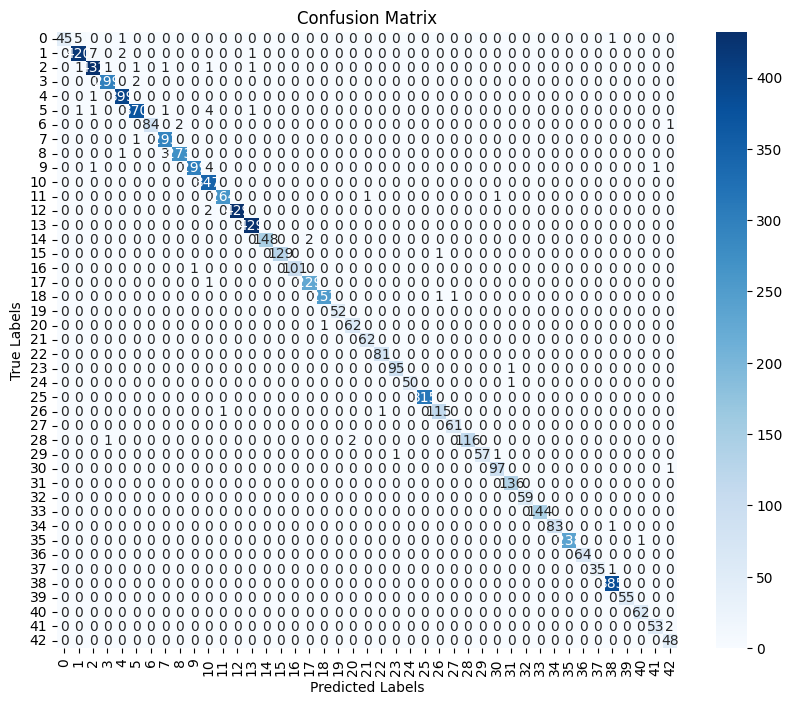

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

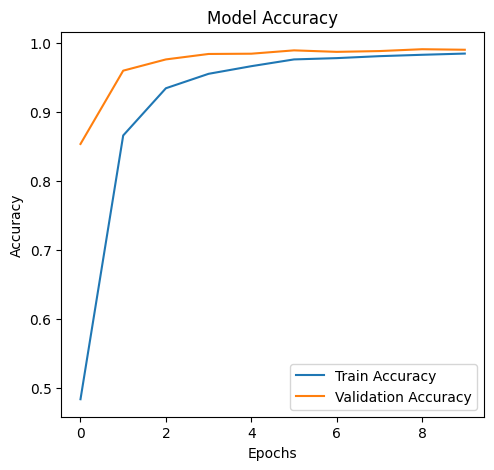

In [21]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

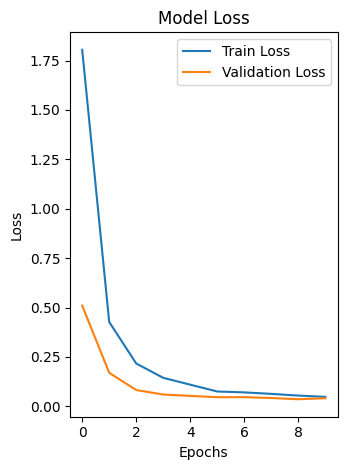

In [22]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Save the Model

In [23]:
model.save('traffic_sign_model.h5')
print("Model saved as 'traffic_sign_model.h5'")

Model saved as 'traffic_sign_model.h5'
